    9 exnode9 human image
      1] 사람 이미지
        1. package loadimg
        2. image reading & show
        3. semantic segmentation
            1) model downloading
            2) instance model: model creation & model_file 적용
            3) 모델에 이미지 적용 ... 이미지에서 사람 분리         
        4. 분리된 이미지 분석
            1) PASCAL VOC 데이터의 라벨 종류
            2) 분리된 이미지 보기
            3) 결과 값 중 배열 출력 
            4) pacalvoc에 담겨있는 라벨을 출력 :(class id) background, chair,person
               - segvalues에는 class_ids와 masks, class_ids를 통해 어떤 물체가 담겨 있는지 확인
            5) output 색상 확인(class id 색상)
            6) 사람 색상 확인 
            7) 색상 변경 bgr -> rgb(9번 변경)
            8) 사람 색상만 true, 나머지 false(회색)
            9) 원본에 segmentation 적용
        5. 배경 흐리게 (0:투명, 255:검정)
            1) blur
            2) 배경 추출
        6. 사진 합치기
        
      2] 고양이 이미지 
        1. image reading & show
        2. semantic segmentation
        3. 분리된 이미지 분석
        4. 배경 흐리게
        5. 사진 합치기
      3] 배경이미지 변경 
      4] 제공된 이미지 문제점 및 해결책
         - 이어폰 흐릿하게 보임
         - 옷깃 흐릿하게 보임

In [70]:
# 1. package loading ... urllib는 웹 데이터를 다운로드 , cv2는 이미지 처리, pixellib는 시맨틱 세그멘테이션

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(720, 1280, 3)


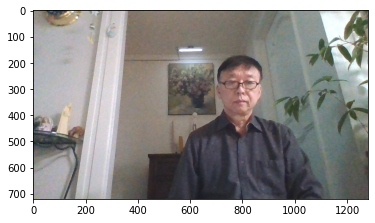

In [71]:
#2. image reading & show ... 이미지 파일을 읽어서 변수에 저장

img_man_path = os.getenv('HOME')+'/aiffel/16_excode/221014_exnode9_human_image/WIN_20221014_08_41_30_Pro.jpg'  
img_man_img = cv2.imread(img_man_path) 

print(img_man_img.shape)   #사람 image

# cv2.cvtColor: 입력 이미지의 색상 채널을 변경(BGR 형식을 RGB 형식으로 변경)

plt.imshow(cv2.cvtColor(img_man_img, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
#3-1) . semantic segmentation .... segmentation model downloading
# 모델 저장 할 DIR,FILE 
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다 : model_url을 model_file 저장
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f5aa152e8e0>)

In [73]:
#3-2) semantic segmentation ... model creation & model_file 적용

#PixelLib 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련할 모델(model_file)을 로드하는 함수


In [74]:
#3-3) semantic segmentation  ... 이미지호출
segvalues, output = model.segmentAsPascalvoc(img_man_path) #입력된 이미지를 분할, 분할 출력의 배열을 가져옴


In [75]:
#4-1 segmentation image 합치기 ... segmentation 정보 확인 .. 라벨종류

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

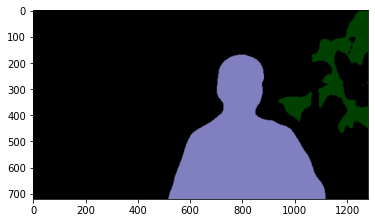

In [76]:
#4-2 segmentation image 합치기 ... segmentation 결과 보기 ... matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [77]:
#4-3 segmentation image 합치기 ... segmentation 결과 값 (array) .. 분리된 값 확인가능:배열값을 출력
segvalues 

{'class_ids': array([ 0, 15, 16]),
 'masks': array([[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [78]:
#4-4 segmentation image 합치기 ... class id 에 현재 label .. 3가지

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
pottedplant


In [79]:
#4-5 segmentation image 합치기 ... label 색상 확인 

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [80]:
#4-5 segmentation image 합치기 ... 사람 label 색상 확인  ...#LABEL_NAMES 15번째인 사람)
colormap[15] 

array([192, 128, 128])

In [81]:
#4-6 segmentation image 합치기 ... 색상 변경   bgr2rgb  
seg_color = (128,128,192) 

(720, 1280)


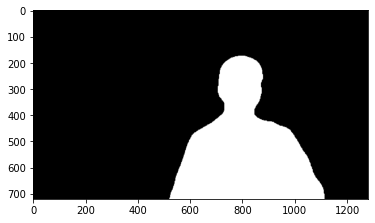

In [82]:
#4-7 segmentation image 합치기 ... 사람과 다은 것 분리 (seg_color: true,false) ... cmap='gray' 변경 가능

seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

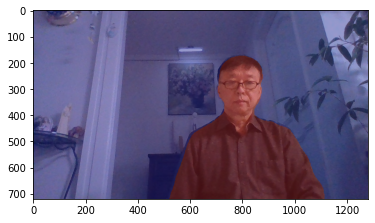

In [83]:
#4-8 segmentation image 합치기 ... 원본 > 사본 ... 사본과 segmentation 합치기
# 원본이미지를 img_show에 할당 ... 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 만듬 .. 2 이미지 합침
img_show_man = img_man_img.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_man = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_man = cv2.applyColorMap(img_mask_man, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다 , 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_man = cv2.addWeighted(img_show_man, 0.6, color_mask_man, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_man, cv2.COLOR_BGR2RGB))
plt.show()

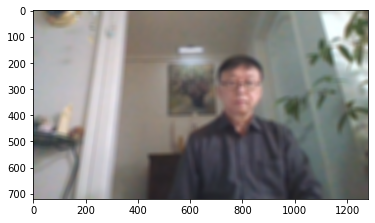

In [84]:
#5) 배경 흐리게  ...  (13,13)은 blurring kernel size ... 변경 가능
img_man_blur = cv2.blur(img_man_img, (20,20))

# plt.imshow(): 저장된 데이터를 이미지의 형식 표시, cv2.cvtColor: 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_man_blur, cv2.COLOR_BGR2RGB))
plt.show()

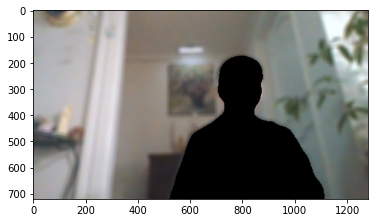

In [85]:
#5) 배경 흐리게  ... 배경 추출 ...  입력 이미지의 색상 채널을 변경, COLOR_GRAY2BGR
color_mask_man = cv2.cvtColor(img_mask_man, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지 반전, 배경이 0 사람이 255 >  배경은 255 사람은 0입니다. 
img_bg_mask_man = cv2.bitwise_not(color_mask_man)

# cv2.bitwise_and()은 배경만 있는 영상 확보 , 사람이 0인 경우 사람 픽셀이 0이 됩니다. 사람이 사라지고 배경만
img_man_bg_blur = cv2.bitwise_and(img_man_blur, img_bg_mask_man)
plt.imshow(cv2.cvtColor(img_man_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

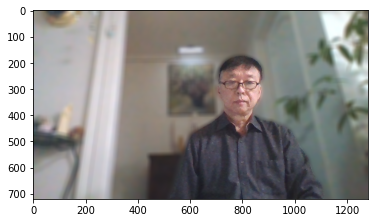

In [86]:
#6) 사진 합치기

# np.where(조건, 참, 거짓), # 세그멘테이션 마스크가 255인 부분 원본 이미지,아닌 영역은 블러된 이미지 값
img_man_concat = np.where(color_mask_man==255, img_man_img, img_man_bg_blur)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_man_concat, cv2.COLOR_BGR2RGB))
plt.show()

(426, 640, 3)


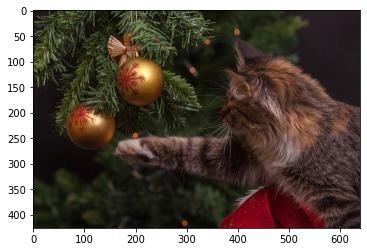

In [87]:
#2-1] 고양이 이미지  ...  image reading & show
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_cat_path = os.getenv('HOME')+'/aiffel/16_excode/221014_exnode9_human_image/cat-g48bbfaf0b_640.jpg'  
img_cat = cv2.imread(img_cat_path) 

print(img_cat.shape)     #고양이 image

# 입력 이미지의 색상 채널을 변경(BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [88]:
#2-2] semantic segmentation  ... 이미지호출
segvalues, output = model.segmentAsPascalvoc(img_cat_path) #입력된 이미지를 분할, 분할 출력의 배열을 가져옴

In [89]:
#2-3] 분리된 이미지 분석 ... segmentation 정보 확인 .. 라벨종류

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

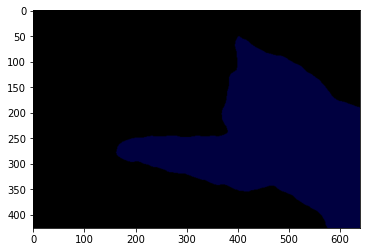

In [90]:
#2-3] 분리된 이미지 분석 ... segmentation 결과 보기
# 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [91]:
#2-3] 분리된 이미지 분석 ... segmentation 결과 값 (array) .. 분리된 값 확인 : 배열값을 출력
segvalues  

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [92]:
#2-3] 분리된 이미지 분석  ... class id 에 현재 label .. 2가지

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [93]:
#2-3] 분리된 이미지 분석  ... 고양이 label 색상 확인 : 컬러맵 8에 해당
colormap[8] 

array([64,  0,  0])

In [94]:
#2-3] 분리된 이미지 분석 ... 색상 변경   bgr2rgb  
seg_color = (0,0,64) 

(426, 640)


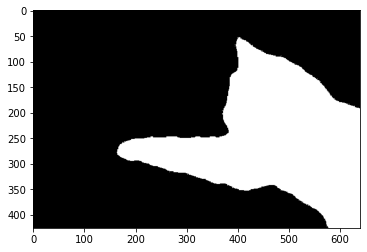

In [95]:
#2-3] 분리된 이미지 분석  ...  분리 (seg_color: true,false) ... cmap='gray' 변경 가능

seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

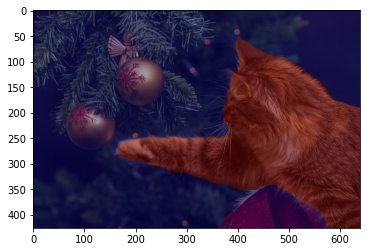

In [96]:
#2-3] 분리된 이미지 분석 ... 원본 > 사본 ... 원본이미지: Img_show ...위치와 배경을 분리 color_mask .. 합침
img_show_cat = img_cat.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_cat = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_cat = cv2.applyColorMap(img_mask_cat, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다 , 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_cat = cv2.addWeighted(img_show_cat, 0.6, color_mask_cat, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_cat, cv2.COLOR_BGR2RGB))
plt.show()

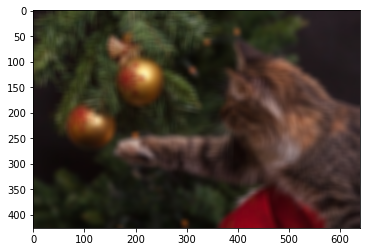

In [97]:
#2-4] 배경 흐리게 ...(13,13)은 blurring kernel size ... 변경 가능
img_orig_blur_cat = cv2.blur(img_cat, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식 표시, cv2.cvtColor: 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_orig_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

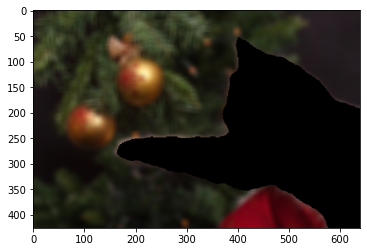

In [104]:
#2-4] 배경 흐리게   ... 배경 추출 ... 이미지의 색상 채널을 변경, COLOR_GRAY2BGR
img_mask_color_cat = cv2.cvtColor(img_mask_cat, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지 반전 
img_bg_mask_cat = cv2.bitwise_not(img_mask_color_cat)

# cv2.bitwise_and()은 배경만 있는 영상 확보 
img_bg_blur_cat = cv2.bitwise_and(img_orig_blur_cat, img_bg_mask_cat)
plt.imshow(cv2.cvtColor(img_bg_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

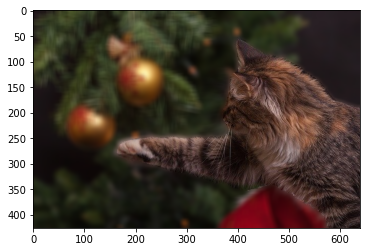

In [99]:
#2-5] 사진 합치기

# np.where(조건, 참, 거짓), # 세그멘테이션 마스크가 255인 부분 원본 이미지,아닌 영역은 블러된 이미지 값
img_concat = np.where(img_mask_color_cat==255, img_cat, img_orig_blur_cat)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(426, 640, 3)
(426, 640, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


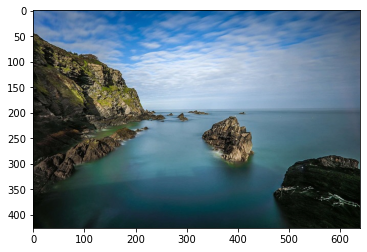

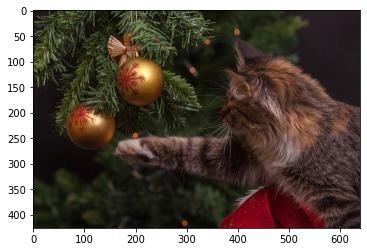

In [100]:
#3-1] 배경전환 이미지  ...  image reading & show  

img_path3 = os.getenv('HOME')+'/aiffel/16_excode/221014_exnode9_human_image/coast_640_2.jpg'  
img_orig3 = cv2.imread(img_path3) 

print(img_orig3.shape)   #mountain image
print(img_cat.shape)   #cat image

print(type(img_orig3))
print(type(img_cat))
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경(BGR 형식을 RGB 형식으로 변경)

plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

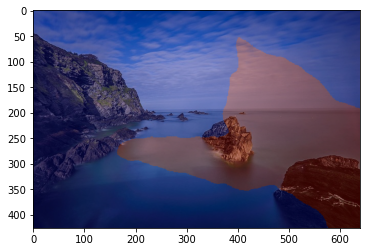

In [101]:
#3-1] 배경전환 이미지  ... 원본 > 사본 ... 원본이미지를 img_show ... color_mask를 만듬 ... 합침 
#2-3] 에서 작성 된 img_mask,color_mask 활용
img_show = img_orig3.copy()

# 원본 이미지와 마스트를 적당히 합쳐봅니다 , 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask_cat, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

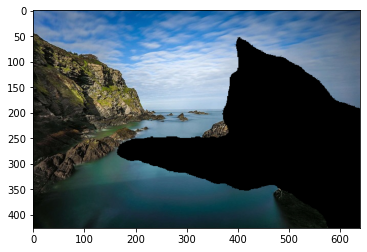

In [102]:
#3-1] 배경전환 이미지  ... 배경 추출 
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경, COLOR_GRAY2BGR
img_mask_color = cv2.cvtColor(img_mask_cat, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지 반전, 배경이 0 고양이 255
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()은 배경만 있는 영상 확보 ,고양이 픽셀이 0
img_bg = cv2.bitwise_and(img_orig3, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

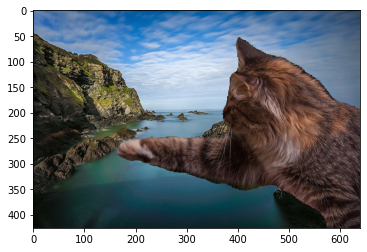

In [103]:
#3-1] 배경전환 이미지   .. 

# np.where(조건, 참, 거짓), # 세그멘테이션 마스크가 255인 부분 원본 이미지,아닌 영역은 블러된 이미지 값
img_concat = np.where(img_mask_color==255, img_cat, img_bg)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(317, 565, 3)
<class 'numpy.ndarray'>


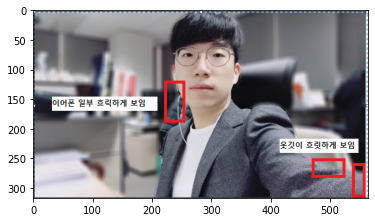

In [107]:
#4] 제공된 이미지 문제점 및 해결책

img_path4 = os.getenv('HOME')+'/aiffel/16_excode/221014_exnode9_human_image/exnode9_human_image_1.PNG'  
img_orig4 = cv2.imread(img_path4) 

print(img_orig4.shape) 

print(type(img_orig4))

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경(BGR 형식을 RGB 형식으로 변경)

plt.imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
plt.show()

    1. 문제점 : 일부 사람이 착용하고 있는 이어폰과 옷에 흐릿하게 보이고 있슴 
                배경화면과 사람과의 경계부분에 대한 처리가 부족함 
         
    2. 해결책 : 
       - 사진의 깊이와 사물의 움직임 
         . 사진의 깊이와 사물의 움직임을 예측하기 위한 비지도 학습 방법으로, 장면과 개별 객체 움직임을 
           모델링합니다.
           
       - 접근
         . 개별 물체에 대한 모션 변환을 학습하고 다른 손실 중에서도 광도 측정 일관성을 적용합니다.
          
       - 주요 아이디어는 개별 사물을 모델링하여 학습 과정에 기하학적 구조를 도입하는 것입니다. 
         카메라의 사진술과 물체 움직임에 대한 학습으로 이미지를 예측 구성하는 것입니다. 
         또한 알려지지 않은 영역에 대한 학습을 적응시키기 위해 다양한 data를 도입 기하학적 모델을 구현
         한는 것입니다.

